In [133]:
import numpy as np
from matplotlib import pyplot as plt
import pickle
from helper_fn import data_import, relabel

In [134]:
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [135]:
from tensorflow.keras.models import load_model

In [136]:
test_path='./Group_10/test'
train_path='./Group_10/train'
val_path='./Group_10/val'

#import datasets
train_data, train_labels = data_import(train_path)
test_data, test_labels = data_import(test_path)
val_data, val_labels = data_import(val_path)

train_data = train_data.reshape(-1, 784)/255.0
test_data = test_data.reshape(-1, 784)/255.0
val_data = val_data.reshape(-1, 784)/255.0

train_labels = relabel(train_labels)
test_labels = relabel(test_labels)
val_labels = relabel(val_labels)

mean_vec = np.mean(train_data, axis=0) # 784 dimentional vector
# print(mean_vec.shape) 

# mean correction
train_data = train_data - mean_vec
test_data = test_data - mean_vec
val_data = val_data - mean_vec

# PCA Task1

## 32 PCA

In [137]:
with open("./pca_models/pca32.pkl", mode="rb") as f:
    pca32 = pickle.load(f)

reduced_train = pca32.transform(train_data)
reduced_test = pca32.transform(test_data)
reduced_val = pca32.transform(val_data)

In [138]:
model = load_model("./pca_models/pcamodel1_32.h5")
model.summary()
print("Train data eval:")
print(model.evaluate(reduced_train, train_labels))

print("Test data eval:")
print(model.evaluate(reduced_test, test_labels))

print("Val data eval:")
print(model.evaluate(reduced_val, val_labels))



Model: "Model-PCA32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 32)]              0         
                                                                 
 Layer1 (Dense)              (None, 16)                528       
                                                                 
 Layer2 (Dense)              (None, 8)                 136       
                                                                 
 Output (Dense)              (None, 5)                 45        
                                                                 
Total params: 709
Trainable params: 709
Non-trainable params: 0
_________________________________________________________________
Train data eval:
356/356 [==============================] - 0s 272us/step - loss: 0.0068 - accuracy: 0.9987
[0.006802352145314217, 0.9986824989318848]
Test data eval:
119/119 [=============

In [139]:
model = load_model("./pca_models/pcamodel2_32.h5")
model.summary()
print("Train data eval:")
print(model.evaluate(reduced_train, train_labels))

print("Test data eval:")
print(model.evaluate(reduced_test, test_labels))

print("Val data eval:")
print(model.evaluate(reduced_val, val_labels))


Model: "Model-PCA32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 32)]              0         
                                                                 
 Layer1 (Dense)              (None, 256)               8448      
                                                                 
 Layer2 (Dense)              (None, 128)               32896     
                                                                 
 Layer3 (Dense)              (None, 64)                8256      
                                                                 
 Layer4 (Dense)              (None, 32)                2080      
                                                                 
 Output (Dense)              (None, 5)                 165       
                                                                 
Total params: 51,845
Trainable params: 51,845
Non-train

## 64 PCA

In [140]:
with open("./pca_models/pca64.pkl", mode="rb") as f:
    pca64 = pickle.load(f)

reduced_train = pca64.transform(train_data)
reduced_test = pca64.transform(test_data)
reduced_val = pca64.transform(val_data)

In [141]:
model = load_model("./pca_models/pcamodel1_64.h5")
model.summary()
print("Train data eval:")
print(model.evaluate(reduced_train, train_labels))

print("Test data eval:")
print(model.evaluate(reduced_test, test_labels))

print("Val data eval:")
print(model.evaluate(reduced_val, val_labels))



Model: "Model-PCA64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 64)]              0         
                                                                 
 Layer1 (Dense)              (None, 16)                1040      
                                                                 
 Layer2 (Dense)              (None, 8)                 136       
                                                                 
 Output (Dense)              (None, 5)                 45        
                                                                 
Total params: 1,221
Trainable params: 1,221
Non-trainable params: 0
_________________________________________________________________
Train data eval:
356/356 [==============================] - 0s 396us/step - loss: 0.0059 - accuracy: 0.9989
[0.005892763379961252, 0.9989460110664368]
Test data eval:
119/119 [=========

In [142]:
model = load_model("./pca_models/pcamodel2_64.h5")
model.summary()
print("Train data eval:")
print(model.evaluate(reduced_train, train_labels))

print("Test data eval:")
print(model.evaluate(reduced_test, test_labels))

print("Val data eval:")
print(model.evaluate(reduced_val, val_labels))

Model: "Model-PCA64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 64)]              0         
                                                                 
 Layer1 (Dense)              (None, 256)               16640     
                                                                 
 Layer2 (Dense)              (None, 128)               32896     
                                                                 
 Layer3 (Dense)              (None, 64)                8256      
                                                                 
 Layer4 (Dense)              (None, 32)                2080      
                                                                 
 Output (Dense)              (None, 5)                 165       
                                                                 
Total params: 60,037
Trainable params: 60,037
Non-train

## 128 PCA

In [143]:
with open("./pca_models/pca128.pkl", mode="rb") as f:
    pca128 = pickle.load(f)

reduced_train = pca128.transform(train_data)
reduced_test = pca128.transform(test_data)
reduced_val = pca128.transform(val_data)

In [144]:
model = load_model("./pca_models/pcamodel1_128.h5")
model.summary()

print("Train data eval:")
print(model.evaluate(reduced_train, train_labels))

print("Test data eval:")
print(model.evaluate(reduced_test, test_labels))

print("Val data eval:")
print(model.evaluate(reduced_val, val_labels))


Model: "Model-PCA128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 128)]             0         
                                                                 
 Layer1 (Dense)              (None, 16)                2064      
                                                                 
 Layer2 (Dense)              (None, 8)                 136       
                                                                 
 Output (Dense)              (None, 5)                 45        
                                                                 
Total params: 2,245
Trainable params: 2,245
Non-trainable params: 0
_________________________________________________________________
Train data eval:
356/356 [==============================] - 0s 389us/step - loss: 0.0014 - accuracy: 0.9998
[0.0014380599604919553, 0.9998243451118469]
Test data eval:
119/119 [=======

In [145]:
model = load_model("./pca_models/pcamodel2_128.h5")
model.summary()

print("Train data eval:")
print(model.evaluate(reduced_train, train_labels))

print("Test data eval:")
print(model.evaluate(reduced_test, test_labels))

print("Val data eval:")
print(model.evaluate(reduced_val, val_labels))


Model: "Model-PCA128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 128)]             0         
                                                                 
 Layer1 (Dense)              (None, 256)               33024     
                                                                 
 Layer2 (Dense)              (None, 128)               32896     
                                                                 
 Layer3 (Dense)              (None, 64)                8256      
                                                                 
 Layer4 (Dense)              (None, 32)                2080      
                                                                 
 Output (Dense)              (None, 5)                 165       
                                                                 
Total params: 76,421
Trainable params: 76,421
Non-trai

## 256 PCA

In [146]:
with open("./pca_models/pca256.pkl", mode="rb") as f:
    pca256 = pickle.load(f)

reduced_train = pca256.transform(train_data)
reduced_test = pca256.transform(test_data)
reduced_val = pca256.transform(val_data)

In [147]:
model = load_model("./pca_models/pcamodel1_256.h5")
model.summary()

print("Train data eval:")
print(model.evaluate(reduced_train, train_labels))

print("Test data eval:")
print(model.evaluate(reduced_test, test_labels))

print("Val data eval:")
print(model.evaluate(reduced_val, val_labels))


Model: "Model-PCA256"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 256)]             0         
                                                                 
 Layer1 (Dense)              (None, 16)                4112      
                                                                 
 Layer2 (Dense)              (None, 8)                 136       
                                                                 
 Output (Dense)              (None, 5)                 45        
                                                                 
Total params: 4,293
Trainable params: 4,293
Non-trainable params: 0
_________________________________________________________________
Train data eval:
356/356 [==============================] - 0s 409us/step - loss: 0.0025 - accuracy: 0.9996
[0.0024928180500864983, 0.9996486902236938]
Test data eval:
119/119 [=======

In [148]:
model = load_model("./pca_models/pcamodel2_256.h5")
model.summary()

print("Train data eval:")
print(model.evaluate(reduced_train, train_labels))

print("Test data eval:")
print(model.evaluate(reduced_test, test_labels))

print("Val data eval:")
print(model.evaluate(reduced_val, val_labels))


Model: "Model-PCA256"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 256)]             0         
                                                                 
 Layer1 (Dense)              (None, 256)               65792     
                                                                 
 Layer2 (Dense)              (None, 128)               32896     
                                                                 
 Layer3 (Dense)              (None, 64)                8256      
                                                                 
 Layer4 (Dense)              (None, 32)                2080      
                                                                 
 Output (Dense)              (None, 5)                 165       
                                                                 
Total params: 109,189
Trainable params: 109,189
Non-tr

# Autoencoders

In [149]:
test_path='./Group_10/test'
train_path='./Group_10/train'
val_path='./Group_10/val'

#import datasets
train_data, train_labels = data_import(train_path)
test_data, test_labels = data_import(test_path)
val_data, val_labels = data_import(val_path)

train_data = train_data.reshape(-1, 784)/255.0
test_data = test_data.reshape(-1, 784)/255.0
val_data = val_data.reshape(-1, 784)/255.0

train_labels = relabel(train_labels)
test_labels = relabel(test_labels)
val_labels = relabel(val_labels)

# mean_vec = np.mean(train_data, axis=0) # 784 dimentional vector
# print(mean_vec.shape) 

## One layer 32 bottleneck

In [208]:
model = load_model("./autoencoder_models/autoencoder_1layer_32.h5")

In [209]:
class1 = train_data[0+100, :]
class2 = train_data[2277+100, :]
class3 = train_data[2*2277+100, :]
class4 = train_data[3*2277+100, :]
class5 = train_data[4*2277+100, :]

Model: "Autoencoder32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Encoder-input (InputLayer)  [(None, 784)]             0         
                                                                 
 Bottleneck-layer (Dense)    (None, 32)                25120     
                                                                 
 Decoder-output (Dense)      (None, 784)               25872     
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 10ms/step


(-0.5, 27.5, 27.5, -0.5)

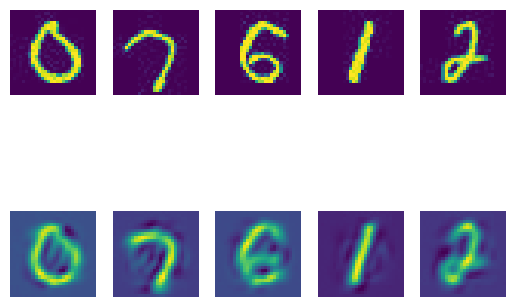

In [210]:
model.summary()

plt.figure()
plt.subplot(2,5,1)
# plt.title("Original")
plt.imshow(class1.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,2)
plt.imshow(class2.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,3)
plt.imshow(class3.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,4)
plt.imshow(class4.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,5)
plt.imshow(class5.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,6)
# plt.title("Original")
recon_class1 = model.predict(class1.reshape((1, -1)))
plt.imshow(recon_class1.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,7)
recon_class2 = model.predict(class2.reshape((1, -1)))
plt.imshow(recon_class2.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,8)
recon_class3 = model.predict(class3.reshape((1, -1)))
plt.imshow(recon_class3.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,9)
recon_class4 = model.predict(class4.reshape((1, -1)))
plt.imshow(recon_class4.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,10)
recon_class5 = model.predict(class5.reshape((1, -1)))
plt.imshow(recon_class5.reshape((28,28)))
plt.axis('off')

### Model 1

In [211]:
encoder = load_model("./autoencoder_models/encoder_1layer_32.h5")
encoded_train = encoder.predict(train_data)
encoded_test = encoder.predict(test_data)
encoded_val = encoder.predict(val_data)

119/119 [==============================] - 0s 240us/step


In [212]:
inputs = Input(shape=(32,), name="Input")
x = Dense(16, activation='tanh', name="Layer1")(inputs)
x = Dense(8, activation='tanh', name="Layer2")(x)
# x = Dense(128, activation='tanh', name="Layer3")(x)
# x = Dense(64, activation='tanh', name="Layer4")(x)
outputs = Dense(5, activation='softmax', name="Output")(x)
model = Model(inputs=inputs, outputs=outputs, name=f"Model-encoder{32}")
model.summary()

adam_optimizer = Adam(learning_rate = 0.001)

model.compile(optimizer=adam_optimizer,
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])
earlystopping = EarlyStopping(monitor='loss',
                                min_delta=1e-4,
                                patience=5,
                                verbose=1)
history1 = model.fit(x=encoded_train, y=train_labels,
                        batch_size=32, epochs=100_000,
                        callbacks=[earlystopping],
                        verbose=0, shuffle=True,
                        validation_split=0.0)

Model: "Model-encoder32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 32)]              0         
                                                                 
 Layer1 (Dense)              (None, 16)                528       
                                                                 
 Layer2 (Dense)              (None, 8)                 136       
                                                                 
 Output (Dense)              (None, 5)                 45        
                                                                 
Total params: 709
Trainable params: 709
Non-trainable params: 0
_________________________________________________________________
Epoch 142: early stopping


In [213]:
print("Training data evaluation")
model.evaluate(encoded_train, train_labels)
print("Testing data evaluation")
model.evaluate(encoded_test, test_labels)
print("Validation data evaluation")
model.evaluate(encoded_val, val_labels)
print()

Training data evaluation
356/356 [==============================] - 0s 242us/step - loss: 0.0055 - accuracy: 0.9993
Testing data evaluation
119/119 [==============================] - 0s 235us/step - loss: 0.1055 - accuracy: 0.9808
Validation data evaluation
119/119 [==============================] - 0s 236us/step - loss: 0.0799 - accuracy: 0.9831



### Model 2

In [214]:
inputs = Input(shape=(32,), name="Input")
x = Dense(256, activation='tanh', name="Layer1")(inputs)
x = Dense(128, activation='tanh', name="Layer2")(x)
x = Dense(64, activation='tanh', name="Layer3")(x)
x = Dense(32, activation='tanh', name="Layer4")(x)
outputs = Dense(5, activation='softmax', name="Output")(x)
model = Model(inputs=inputs, outputs=outputs, name=f"Model-encoder{32}")
model.summary()

adam_optimizer = Adam(learning_rate = 0.001)

model.compile(optimizer=adam_optimizer,
                    loss="sparse_categorical_crossentropy",
                    metrics=['accuracy'])
earlystopping = EarlyStopping(monitor='loss',
                                        min_delta=1e-4,
                                        patience=5,
                                        verbose=1)
history1 = model.fit(x=encoded_train, y=train_labels,
                        batch_size=32, epochs=100_000,
                        callbacks=[earlystopping],
                        verbose=0, shuffle=True,
                        validation_split=0.0)

Model: "Model-encoder32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 32)]              0         
                                                                 
 Layer1 (Dense)              (None, 256)               8448      
                                                                 
 Layer2 (Dense)              (None, 128)               32896     
                                                                 
 Layer3 (Dense)              (None, 64)                8256      
                                                                 
 Layer4 (Dense)              (None, 32)                2080      
                                                                 
 Output (Dense)              (None, 5)                 165       
                                                                 
Total params: 51,845
Trainable params: 51,845
Non-t

In [215]:
print("Training data evaluation")
model.evaluate(encoded_train, train_labels)
print("Testing data evaluation")
model.evaluate(encoded_test, test_labels)
print("Validation data evaluation")
model.evaluate(encoded_val, val_labels)
print()

Training data evaluation
356/356 [==============================] - 0s 317us/step - loss: 0.0018 - accuracy: 0.9997
Testing data evaluation
119/119 [==============================] - 0s 306us/step - loss: 0.0729 - accuracy: 0.9845
Validation data evaluation
119/119 [==============================] - 0s 304us/step - loss: 0.0530 - accuracy: 0.9868



## Three layer 32 bottleneck

In [216]:
model = load_model("./autoencoder_models/autoencoder_3layer_32.h5")

Model: "Autoencoder32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Encoder-input (InputLayer)  [(None, 784)]             0         
                                                                 
 Encoder-hidden (Dense)      (None, 400)               314000    
                                                                 
 Bottleneck-layer (Dense)    (None, 32)                12832     
                                                                 
 Decoder-hidden (Dense)      (None, 400)               13200     
                                                                 
 Decoder-output (Dense)      (None, 784)               314384    
                                                                 
Total params: 654,416
Trainable params: 654,416
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 7ms/s

(-0.5, 27.5, 27.5, -0.5)

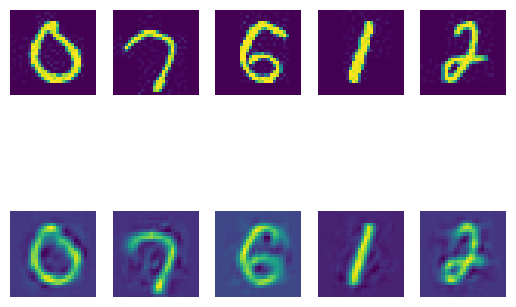

In [217]:
model.summary()

plt.figure()
plt.subplot(2,5,1)
# plt.title("Original")
plt.imshow(class1.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,2)
plt.imshow(class2.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,3)
plt.imshow(class3.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,4)
plt.imshow(class4.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,5)
plt.imshow(class5.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,6)
# plt.title("Original")
recon_class1 = model.predict(class1.reshape((1, -1)))
plt.imshow(recon_class1.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,7)
recon_class2 = model.predict(class2.reshape((1, -1)))
plt.imshow(recon_class2.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,8)
recon_class3 = model.predict(class3.reshape((1, -1)))
plt.imshow(recon_class3.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,9)
recon_class4 = model.predict(class4.reshape((1, -1)))
plt.imshow(recon_class4.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,10)
recon_class5 = model.predict(class5.reshape((1, -1)))
plt.imshow(recon_class5.reshape((28,28)))
plt.axis('off')

### Model 1

In [218]:
encoder = load_model("./autoencoder_models/encoder_3layer_32.h5")
encoded_train = encoder.predict(train_data)
encoded_test = encoder.predict(test_data)
encoded_val = encoder.predict(val_data)

119/119 [==============================] - 0s 365us/step


In [219]:
inputs = Input(shape=(32,), name="Input")
x = Dense(16, activation='tanh', name="Layer1")(inputs)
x = Dense(8, activation='tanh', name="Layer2")(x)
# x = Dense(128, activation='tanh', name="Layer3")(x)
# x = Dense(64, activation='tanh', name="Layer4")(x)
outputs = Dense(5, activation='softmax', name="Output")(x)
model = Model(inputs=inputs, outputs=outputs, name=f"Model-encoder{32}")
model.summary()

adam_optimizer = Adam(learning_rate = 0.001)

model.compile(optimizer=adam_optimizer,
                    loss="sparse_categorical_crossentropy",
                    metrics=['accuracy'])
earlystopping = EarlyStopping(monitor='loss',
                                        min_delta=1e-4,
                                        patience=5,
                                        verbose=1)
history1 = model.fit(x=encoded_train, y=train_labels,
                        batch_size=32, epochs=100_000,
                        callbacks=[earlystopping],
                        verbose=0, shuffle=True,
                        validation_split=0.0)

Model: "Model-encoder32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 32)]              0         
                                                                 
 Layer1 (Dense)              (None, 16)                528       
                                                                 
 Layer2 (Dense)              (None, 8)                 136       
                                                                 
 Output (Dense)              (None, 5)                 45        
                                                                 
Total params: 709
Trainable params: 709
Non-trainable params: 0
_________________________________________________________________
Epoch 161: early stopping


In [220]:
print("Training data evaluation")
model.evaluate(encoded_train, train_labels)
print("Testing data evaluation")
model.evaluate(encoded_test, test_labels)
print("Validation data evaluation")
model.evaluate(encoded_val, val_labels)
print()

Training data evaluation
356/356 [==============================] - 0s 240us/step - loss: 0.0033 - accuracy: 0.9997
Testing data evaluation
119/119 [==============================] - 0s 236us/step - loss: 0.1137 - accuracy: 0.9779
Validation data evaluation
119/119 [==============================] - 0s 238us/step - loss: 0.1138 - accuracy: 0.9818



### Model 2

In [221]:
inputs = Input(shape=(32,), name="Input")
x = Dense(256, activation='tanh', name="Layer1")(inputs)
x = Dense(128, activation='tanh', name="Layer2")(x)
x = Dense(64, activation='tanh', name="Layer3")(x)
x = Dense(32, activation='tanh', name="Layer4")(x)
outputs = Dense(5, activation='softmax', name="Output")(x)
model = Model(inputs=inputs, outputs=outputs, name=f"Model-encoder{32}")
model.summary()

adam_optimizer = Adam(learning_rate = 0.001)

model.compile(optimizer=adam_optimizer,
                    loss="sparse_categorical_crossentropy",
                    metrics=['accuracy'])
earlystopping = EarlyStopping(monitor='loss',
                                        min_delta=1e-4,
                                        patience=5,
                                        verbose=1)
history1 = model.fit(x=encoded_train, y=train_labels,
                        batch_size=32, epochs=100_000,
                        callbacks=[earlystopping],
                        verbose=0, shuffle=True,
                        validation_split=0.0)

Model: "Model-encoder32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 32)]              0         
                                                                 
 Layer1 (Dense)              (None, 256)               8448      
                                                                 
 Layer2 (Dense)              (None, 128)               32896     
                                                                 
 Layer3 (Dense)              (None, 64)                8256      
                                                                 
 Layer4 (Dense)              (None, 32)                2080      
                                                                 
 Output (Dense)              (None, 5)                 165       
                                                                 
Total params: 51,845
Trainable params: 51,845
Non-t

In [222]:
print("Training data evaluation")
model.evaluate(encoded_train, train_labels)
print("Testing data evaluation")
model.evaluate(encoded_test, test_labels)
print("Validation data evaluation")
model.evaluate(encoded_val, val_labels)
print()

Training data evaluation
356/356 [==============================] - 0s 307us/step - loss: 0.0028 - accuracy: 0.9992
Testing data evaluation
119/119 [==============================] - 0s 301us/step - loss: 0.0751 - accuracy: 0.9866
Validation data evaluation
119/119 [==============================] - 0s 304us/step - loss: 0.0538 - accuracy: 0.9850



## One layer 64 bottleneck

In [223]:
model = load_model("./autoencoder_models/autoencoder_1layer_64.h5")

Model: "Autoencoder64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Encoder-input (InputLayer)  [(None, 784)]             0         
                                                                 
 Bottleneck-layer (Dense)    (None, 64)                50240     
                                                                 
 Decoder-output (Dense)      (None, 784)               50960     
                                                                 
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 7ms/step


(-0.5, 27.5, 27.5, -0.5)

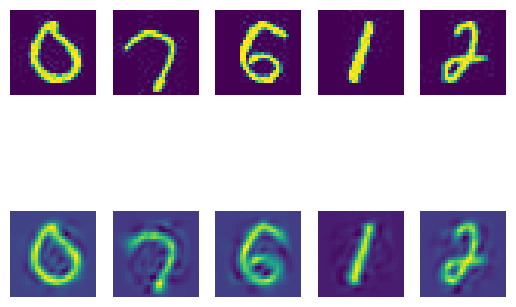

In [224]:
model.summary()

plt.figure()
plt.subplot(2,5,1)
# plt.title("Original")
plt.imshow(class1.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,2)
plt.imshow(class2.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,3)
plt.imshow(class3.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,4)
plt.imshow(class4.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,5)
plt.imshow(class5.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,6)
# plt.title("Original")
recon_class1 = model.predict(class1.reshape((1, -1)))
plt.imshow(recon_class1.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,7)
recon_class2 = model.predict(class2.reshape((1, -1)))
plt.imshow(recon_class2.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,8)
recon_class3 = model.predict(class3.reshape((1, -1)))
plt.imshow(recon_class3.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,9)
recon_class4 = model.predict(class4.reshape((1, -1)))
plt.imshow(recon_class4.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,10)
recon_class5 = model.predict(class5.reshape((1, -1)))
plt.imshow(recon_class5.reshape((28,28)))
plt.axis('off')

### Model 1

In [225]:
encoder = load_model("./autoencoder_models/encoder_1layer_64.h5")
encoded_train = encoder.predict(train_data)
encoded_test = encoder.predict(test_data)
encoded_val = encoder.predict(val_data)

119/119 [==============================] - 0s 254us/step


In [226]:
inputs = Input(shape=(64,), name="Input")
x = Dense(16, activation='tanh', name="Layer1")(inputs)
x = Dense(8, activation='tanh', name="Layer2")(x)
# x = Dense(128, activation='tanh', name="Layer3")(x)
# x = Dense(64, activation='tanh', name="Layer4")(x)
outputs = Dense(5, activation='softmax', name="Output")(x)
model = Model(inputs=inputs, outputs=outputs, name=f"Model-encoder{64}")
model.summary()

adam_optimizer = Adam(learning_rate = 0.001)

model.compile(optimizer=adam_optimizer,
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])
earlystopping = EarlyStopping(monitor='loss',
                                min_delta=1e-4,
                                patience=5,
                                verbose=1)
history1 = model.fit(x=encoded_train, y=train_labels,
                        batch_size=32, epochs=100_000,
                        callbacks=[earlystopping],
                        verbose=0, shuffle=True,
                        validation_split=0.0)

Model: "Model-encoder64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 64)]              0         
                                                                 
 Layer1 (Dense)              (None, 16)                1040      
                                                                 
 Layer2 (Dense)              (None, 8)                 136       
                                                                 
 Output (Dense)              (None, 5)                 45        
                                                                 
Total params: 1,221
Trainable params: 1,221
Non-trainable params: 0
_________________________________________________________________
Epoch 108: early stopping


In [227]:
print("Training data evaluation")
model.evaluate(encoded_train, train_labels)
print("Testing data evaluation")
model.evaluate(encoded_test, test_labels)
print("Validation data evaluation")
model.evaluate(encoded_val, val_labels)
print()

Training data evaluation
356/356 [==============================] - 0s 243us/step - loss: 8.0464e-04 - accuracy: 0.9999
Testing data evaluation
119/119 [==============================] - 0s 240us/step - loss: 0.1366 - accuracy: 0.9784
Validation data evaluation
119/119 [==============================] - 0s 235us/step - loss: 0.0976 - accuracy: 0.9792



### Model 2

In [228]:
inputs = Input(shape=(64,), name="Input")
x = Dense(256, activation='tanh', name="Layer1")(inputs)
x = Dense(128, activation='tanh', name="Layer2")(x)
x = Dense(64, activation='tanh', name="Layer3")(x)
x = Dense(32, activation='tanh', name="Layer4")(x)
outputs = Dense(5, activation='softmax', name="Output")(x)
model = Model(inputs=inputs, outputs=outputs, name=f"Model-encoder{64}")
model.summary()

adam_optimizer = Adam(learning_rate = 0.001)

model.compile(optimizer=adam_optimizer,
                    loss="sparse_categorical_crossentropy",
                    metrics=['accuracy'])
earlystopping = EarlyStopping(monitor='loss',
                                        min_delta=1e-4,
                                        patience=5,
                                        verbose=1)
history1 = model.fit(x=encoded_train, y=train_labels,
                        batch_size=32, epochs=100_000,
                        callbacks=[earlystopping],
                        verbose=0, shuffle=True,
                        validation_split=0.0)

Model: "Model-encoder64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 64)]              0         
                                                                 
 Layer1 (Dense)              (None, 256)               16640     
                                                                 
 Layer2 (Dense)              (None, 128)               32896     
                                                                 
 Layer3 (Dense)              (None, 64)                8256      
                                                                 
 Layer4 (Dense)              (None, 32)                2080      
                                                                 
 Output (Dense)              (None, 5)                 165       
                                                                 
Total params: 60,037
Trainable params: 60,037
Non-t

In [229]:
print("Training data evaluation")
model.evaluate(encoded_train, train_labels)
print("Testing data evaluation")
model.evaluate(encoded_test, test_labels)
print("Validation data evaluation")
model.evaluate(encoded_val, val_labels)
print()

Training data evaluation
356/356 [==============================] - 0s 329us/step - loss: 3.1206e-05 - accuracy: 1.0000
Testing data evaluation
119/119 [==============================] - 0s 326us/step - loss: 0.0827 - accuracy: 0.9855
Validation data evaluation
119/119 [==============================] - 0s 323us/step - loss: 0.0633 - accuracy: 0.9892



## Three layer 64 bottleneck

In [230]:
model = load_model("./autoencoder_models/autoencoder_3layer_64.h5")

Model: "Autoencoder64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Encoder-input (InputLayer)  [(None, 784)]             0         
                                                                 
 Encoder-hidden (Dense)      (None, 400)               314000    
                                                                 
 Bottleneck-layer (Dense)    (None, 64)                25664     
                                                                 
 Decoder-hidden (Dense)      (None, 400)               26000     
                                                                 
 Decoder-output (Dense)      (None, 784)               314384    
                                                                 
Total params: 680,048
Trainable params: 680,048
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 7ms/s

(-0.5, 27.5, 27.5, -0.5)

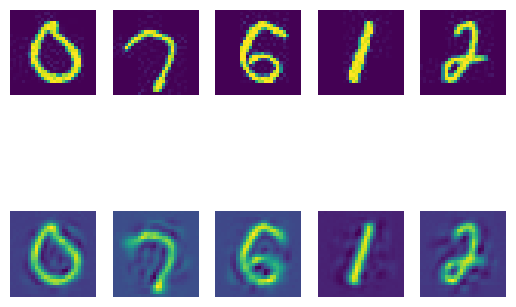

In [231]:
model.summary()

plt.figure()
plt.subplot(2,5,1)
# plt.title("Original")
plt.imshow(class1.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,2)
plt.imshow(class2.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,3)
plt.imshow(class3.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,4)
plt.imshow(class4.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,5)
plt.imshow(class5.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,6)
# plt.title("Original")
recon_class1 = model.predict(class1.reshape((1, -1)))
plt.imshow(recon_class1.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,7)
recon_class2 = model.predict(class2.reshape((1, -1)))
plt.imshow(recon_class2.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,8)
recon_class3 = model.predict(class3.reshape((1, -1)))
plt.imshow(recon_class3.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,9)
recon_class4 = model.predict(class4.reshape((1, -1)))
plt.imshow(recon_class4.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,10)
recon_class5 = model.predict(class5.reshape((1, -1)))
plt.imshow(recon_class5.reshape((28,28)))
plt.axis('off')

### Model 1

In [232]:
encoder = load_model("./autoencoder_models/encoder_3layer_64.h5")
encoded_train = encoder.predict(train_data)
encoded_test = encoder.predict(test_data)
encoded_val = encoder.predict(val_data)

119/119 [==============================] - 0s 374us/step


In [233]:
inputs = Input(shape=(64,), name="Input")
x = Dense(16, activation='tanh', name="Layer1")(inputs)
x = Dense(8, activation='tanh', name="Layer2")(x)
# x = Dense(128, activation='tanh', name="Layer3")(x)
# x = Dense(64, activation='tanh', name="Layer4")(x)
outputs = Dense(5, activation='softmax', name="Output")(x)
model = Model(inputs=inputs, outputs=outputs, name=f"Model-encoder{64}")
model.summary()

adam_optimizer = Adam(learning_rate = 0.001)

model.compile(optimizer=adam_optimizer,
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])
earlystopping = EarlyStopping(monitor='loss',
                                min_delta=1e-4,
                                patience=5,
                                verbose=1)
history1 = model.fit(x=encoded_train, y=train_labels,
                        batch_size=32, epochs=100_000,
                        callbacks=[earlystopping],
                        verbose=0, shuffle=True,
                        validation_split=0.0)

Model: "Model-encoder64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 64)]              0         
                                                                 
 Layer1 (Dense)              (None, 16)                1040      
                                                                 
 Layer2 (Dense)              (None, 8)                 136       
                                                                 
 Output (Dense)              (None, 5)                 45        
                                                                 
Total params: 1,221
Trainable params: 1,221
Non-trainable params: 0
_________________________________________________________________
Epoch 128: early stopping


In [234]:
print("Training data evaluation")
model.evaluate(encoded_train, train_labels)
print("Testing data evaluation")
model.evaluate(encoded_test, test_labels)
print("Validation data evaluation")
model.evaluate(encoded_val, val_labels)
print()

Training data evaluation
356/356 [==============================] - 0s 241us/step - loss: 0.0013 - accuracy: 0.9999
Testing data evaluation
119/119 [==============================] - 0s 239us/step - loss: 0.1329 - accuracy: 0.9784
Validation data evaluation
119/119 [==============================] - 0s 239us/step - loss: 0.1113 - accuracy: 0.9802



### Model 2

In [235]:
inputs = Input(shape=(64,), name="Input")
x = Dense(256, activation='tanh', name="Layer1")(inputs)
x = Dense(128, activation='tanh', name="Layer2")(x)
x = Dense(64, activation='tanh', name="Layer3")(x)
x = Dense(32, activation='tanh', name="Layer4")(x)
outputs = Dense(5, activation='softmax', name="Output")(x)
model = Model(inputs=inputs, outputs=outputs, name=f"Model-encoder{64}")
model.summary()

adam_optimizer = Adam(learning_rate = 0.001)

model.compile(optimizer=adam_optimizer,
                    loss="sparse_categorical_crossentropy",
                    metrics=['accuracy'])
earlystopping = EarlyStopping(monitor='loss',
                                        min_delta=1e-4,
                                        patience=5,
                                        verbose=1)
history1 = model.fit(x=encoded_train, y=train_labels,
                        batch_size=32, epochs=100_000,
                        callbacks=[earlystopping],
                        verbose=0, shuffle=True,
                        validation_split=0.0)

Model: "Model-encoder64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 64)]              0         
                                                                 
 Layer1 (Dense)              (None, 256)               16640     
                                                                 
 Layer2 (Dense)              (None, 128)               32896     
                                                                 
 Layer3 (Dense)              (None, 64)                8256      
                                                                 
 Layer4 (Dense)              (None, 32)                2080      
                                                                 
 Output (Dense)              (None, 5)                 165       
                                                                 
Total params: 60,037
Trainable params: 60,037
Non-t

In [236]:
print("Training data evaluation")
model.evaluate(encoded_train, train_labels)
print("Testing data evaluation")
model.evaluate(encoded_test, test_labels)
print("Validation data evaluation")
model.evaluate(encoded_val, val_labels)
print()

Training data evaluation
356/356 [==============================] - 0s 323us/step - loss: 0.0022 - accuracy: 0.9994
Testing data evaluation
119/119 [==============================] - 0s 325us/step - loss: 0.0818 - accuracy: 0.9831
Validation data evaluation
119/119 [==============================] - 0s 317us/step - loss: 0.0772 - accuracy: 0.9842



## One layer 128 bottleneck

In [237]:
model = load_model("./autoencoder_models/autoencoder_1layer_128.h5")

Model: "Autoencoder128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Encoder-input (InputLayer)  [(None, 784)]             0         
                                                                 
 Bottleneck-layer (Dense)    (None, 128)               100480    
                                                                 
 Decoder-output (Dense)      (None, 784)               101136    
                                                                 
Total params: 201,616
Trainable params: 201,616
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 7ms/step


(-0.5, 27.5, 27.5, -0.5)

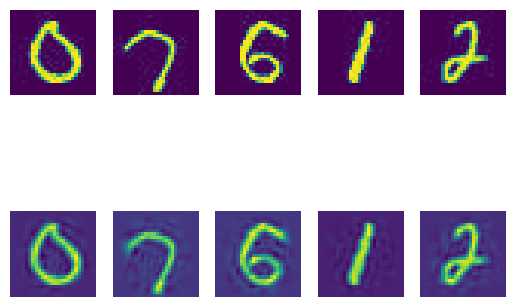

In [238]:
model.summary()

plt.figure()
plt.subplot(2,5,1)
# plt.title("Original")
plt.imshow(class1.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,2)
plt.imshow(class2.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,3)
plt.imshow(class3.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,4)
plt.imshow(class4.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,5)
plt.imshow(class5.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,6)
# plt.title("Original")
recon_class1 = model.predict(class1.reshape((1, -1)))
plt.imshow(recon_class1.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,7)
recon_class2 = model.predict(class2.reshape((1, -1)))
plt.imshow(recon_class2.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,8)
recon_class3 = model.predict(class3.reshape((1, -1)))
plt.imshow(recon_class3.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,9)
recon_class4 = model.predict(class4.reshape((1, -1)))
plt.imshow(recon_class4.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,10)
recon_class5 = model.predict(class5.reshape((1, -1)))
plt.imshow(recon_class5.reshape((28,28)))
plt.axis('off')

### Model 1

In [239]:
encoder = load_model("./autoencoder_models/encoder_1layer_128.h5")
encoded_train = encoder.predict(train_data)
encoded_test = encoder.predict(test_data)
encoded_val = encoder.predict(val_data)

119/119 [==============================] - 0s 270us/step


In [240]:
inputs = Input(shape=(128,), name="Input")
x = Dense(16, activation='tanh', name="Layer1")(inputs)
x = Dense(8, activation='tanh', name="Layer2")(x)
# x = Dense(128, activation='tanh', name="Layer3")(x)
# x = Dense(64, activation='tanh', name="Layer4")(x)
outputs = Dense(5, activation='softmax', name="Output")(x)
model = Model(inputs=inputs, outputs=outputs, name=f"Model-encoder{128}")
model.summary()

adam_optimizer = Adam(learning_rate = 0.001)

model.compile(optimizer=adam_optimizer,
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])
earlystopping = EarlyStopping(monitor='loss',
                                min_delta=1e-4,
                                patience=5,
                                verbose=1)
history1 = model.fit(x=encoded_train, y=train_labels,
                        batch_size=32, epochs=100_000,
                        callbacks=[earlystopping],
                        verbose=0, shuffle=True,
                        validation_split=0.0)

Model: "Model-encoder128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 128)]             0         
                                                                 
 Layer1 (Dense)              (None, 16)                2064      
                                                                 
 Layer2 (Dense)              (None, 8)                 136       
                                                                 
 Output (Dense)              (None, 5)                 45        
                                                                 
Total params: 2,245
Trainable params: 2,245
Non-trainable params: 0
_________________________________________________________________
Epoch 82: early stopping


In [241]:
print("Training data evaluation")
model.evaluate(encoded_train, train_labels)
print("Testing data evaluation")
model.evaluate(encoded_test, test_labels)
print("Validation data evaluation")
model.evaluate(encoded_val, val_labels)
print()

Training data evaluation
356/356 [==============================] - 0s 244us/step - loss: 3.1331e-04 - accuracy: 1.0000
Testing data evaluation
119/119 [==============================] - 0s 243us/step - loss: 0.1255 - accuracy: 0.9805
Validation data evaluation
119/119 [==============================] - 0s 241us/step - loss: 0.1119 - accuracy: 0.9797



### Model 2

In [242]:
inputs = Input(shape=(128,), name="Input")
x = Dense(256, activation='tanh', name="Layer1")(inputs)
x = Dense(128, activation='tanh', name="Layer2")(x)
x = Dense(64, activation='tanh', name="Layer3")(x)
x = Dense(32, activation='tanh', name="Layer4")(x)
outputs = Dense(5, activation='softmax', name="Output")(x)
model = Model(inputs=inputs, outputs=outputs, name=f"Model-encoder{128}")
model.summary()

adam_optimizer = Adam(learning_rate = 0.001)

model.compile(optimizer=adam_optimizer,
                    loss="sparse_categorical_crossentropy",
                    metrics=['accuracy'])
earlystopping = EarlyStopping(monitor='loss',
                                        min_delta=1e-4,
                                        patience=5,
                                        verbose=1)
history1 = model.fit(x=encoded_train, y=train_labels,
                        batch_size=32, epochs=100_000,
                        callbacks=[earlystopping],
                        verbose=0, shuffle=True,
                        validation_split=0.0)

Model: "Model-encoder128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 128)]             0         
                                                                 
 Layer1 (Dense)              (None, 256)               33024     
                                                                 
 Layer2 (Dense)              (None, 128)               32896     
                                                                 
 Layer3 (Dense)              (None, 64)                8256      
                                                                 
 Layer4 (Dense)              (None, 32)                2080      
                                                                 
 Output (Dense)              (None, 5)                 165       
                                                                 
Total params: 76,421
Trainable params: 76,421
Non-

In [243]:
print("Training data evaluation")
model.evaluate(encoded_train, train_labels)
print("Testing data evaluation")
model.evaluate(encoded_test, test_labels)
print("Validation data evaluation")
model.evaluate(encoded_val, val_labels)
print()

Training data evaluation
356/356 [==============================] - 0s 351us/step - loss: 4.4660e-05 - accuracy: 1.0000
Testing data evaluation
119/119 [==============================] - 0s 346us/step - loss: 0.0941 - accuracy: 0.9826
Validation data evaluation
119/119 [==============================] - 0s 348us/step - loss: 0.0704 - accuracy: 0.9876



## Three layer 128 bottleneck

In [244]:
model = load_model("./autoencoder_models/autoencoder_3layer_128.h5")

Model: "Autoencoder128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Encoder-input (InputLayer)  [(None, 784)]             0         
                                                                 
 Encoder-hidden (Dense)      (None, 400)               314000    
                                                                 
 Bottleneck-layer (Dense)    (None, 128)               51328     
                                                                 
 Decoder-hidden (Dense)      (None, 400)               51600     
                                                                 
 Decoder-output (Dense)      (None, 784)               314384    
                                                                 
Total params: 731,312
Trainable params: 731,312
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 7ms/

(-0.5, 27.5, 27.5, -0.5)

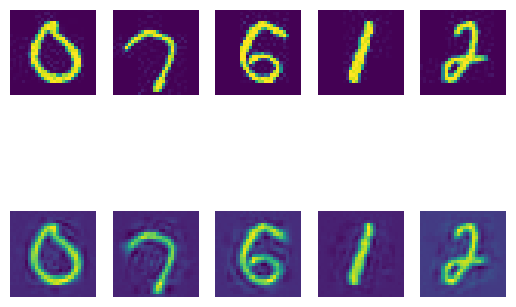

In [245]:
model.summary()

plt.figure()
plt.subplot(2,5,1)
# plt.title("Original")
plt.imshow(class1.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,2)
plt.imshow(class2.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,3)
plt.imshow(class3.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,4)
plt.imshow(class4.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,5)
plt.imshow(class5.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,6)
# plt.title("Original")
recon_class1 = model.predict(class1.reshape((1, -1)))
plt.imshow(recon_class1.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,7)
recon_class2 = model.predict(class2.reshape((1, -1)))
plt.imshow(recon_class2.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,8)
recon_class3 = model.predict(class3.reshape((1, -1)))
plt.imshow(recon_class3.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,9)
recon_class4 = model.predict(class4.reshape((1, -1)))
plt.imshow(recon_class4.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,10)
recon_class5 = model.predict(class5.reshape((1, -1)))
plt.imshow(recon_class5.reshape((28,28)))
plt.axis('off')

### Model 1

In [246]:
encoder = load_model("./autoencoder_models/encoder_3layer_128.h5")
encoded_train = encoder.predict(train_data)
encoded_test = encoder.predict(test_data)
encoded_val = encoder.predict(val_data)

119/119 [==============================] - 0s 389us/step


In [247]:
inputs = Input(shape=(128,), name="Input")
x = Dense(16, activation='tanh', name="Layer1")(inputs)
x = Dense(8, activation='tanh', name="Layer2")(x)
# x = Dense(128, activation='tanh', name="Layer3")(x)
# x = Dense(64, activation='tanh', name="Layer4")(x)
outputs = Dense(5, activation='softmax', name="Output")(x)
model = Model(inputs=inputs, outputs=outputs, name=f"Model-encoder{128}")
model.summary()

adam_optimizer = Adam(learning_rate = 0.001)

model.compile(optimizer=adam_optimizer,
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])
earlystopping = EarlyStopping(monitor='loss',
                                min_delta=1e-4,
                                patience=5,
                                verbose=1)
history1 = model.fit(x=encoded_train, y=train_labels,
                        batch_size=32, epochs=100_000,
                        callbacks=[earlystopping],
                        verbose=0, shuffle=True,
                        validation_split=0.0)

Model: "Model-encoder128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 128)]             0         
                                                                 
 Layer1 (Dense)              (None, 16)                2064      
                                                                 
 Layer2 (Dense)              (None, 8)                 136       
                                                                 
 Output (Dense)              (None, 5)                 45        
                                                                 
Total params: 2,245
Trainable params: 2,245
Non-trainable params: 0
_________________________________________________________________
Epoch 92: early stopping


In [248]:
print("Training data evaluation")
model.evaluate(encoded_train, train_labels)
print("Testing data evaluation")
model.evaluate(encoded_test, test_labels)
print("Validation data evaluation")
model.evaluate(encoded_val, val_labels)
print()

Training data evaluation
356/356 [==============================] - 0s 251us/step - loss: 2.8347e-04 - accuracy: 1.0000
Testing data evaluation
119/119 [==============================] - 0s 251us/step - loss: 0.1284 - accuracy: 0.9779
Validation data evaluation
119/119 [==============================] - 0s 251us/step - loss: 0.1001 - accuracy: 0.9816



### Model 2

In [249]:
inputs = Input(shape=(128,), name="Input")
x = Dense(256, activation='tanh', name="Layer1")(inputs)
x = Dense(128, activation='tanh', name="Layer2")(x)
x = Dense(64, activation='tanh', name="Layer3")(x)
x = Dense(32, activation='tanh', name="Layer4")(x)
outputs = Dense(5, activation='softmax', name="Output")(x)
model = Model(inputs=inputs, outputs=outputs, name=f"Model-encoder{128}")
model.summary()

adam_optimizer = Adam(learning_rate = 0.001)

model.compile(optimizer=adam_optimizer,
                    loss="sparse_categorical_crossentropy",
                    metrics=['accuracy'])
earlystopping = EarlyStopping(monitor='loss',
                                        min_delta=1e-4,
                                        patience=5,
                                        verbose=1)
history1 = model.fit(x=encoded_train, y=train_labels,
                        batch_size=32, epochs=100_000,
                        callbacks=[earlystopping],
                        verbose=0, shuffle=True,
                        validation_split=0.0)

Model: "Model-encoder128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 128)]             0         
                                                                 
 Layer1 (Dense)              (None, 256)               33024     
                                                                 
 Layer2 (Dense)              (None, 128)               32896     
                                                                 
 Layer3 (Dense)              (None, 64)                8256      
                                                                 
 Layer4 (Dense)              (None, 32)                2080      
                                                                 
 Output (Dense)              (None, 5)                 165       
                                                                 
Total params: 76,421
Trainable params: 76,421
Non-

In [250]:
print("Training data evaluation")
model.evaluate(encoded_train, train_labels)
print("Testing data evaluation")
model.evaluate(encoded_test, test_labels)
print("Validation data evaluation")
model.evaluate(encoded_val, val_labels)
print()

Training data evaluation
356/356 [==============================] - 0s 348us/step - loss: 7.9402e-04 - accuracy: 0.9999
Testing data evaluation
119/119 [==============================] - 0s 347us/step - loss: 0.0800 - accuracy: 0.9831
Validation data evaluation
119/119 [==============================] - 0s 350us/step - loss: 0.0495 - accuracy: 0.9876



## One layer 256 bottleneck

In [251]:
model = load_model("./autoencoder_models/autoencoder_1layer_256.h5")

Model: "Autoencoder256"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Encoder-input (InputLayer)  [(None, 784)]             0         
                                                                 
 Bottleneck-layer (Dense)    (None, 256)               200960    
                                                                 
 Decoder-output (Dense)      (None, 784)               201488    
                                                                 
Total params: 402,448
Trainable params: 402,448
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 7ms/step


(-0.5, 27.5, 27.5, -0.5)

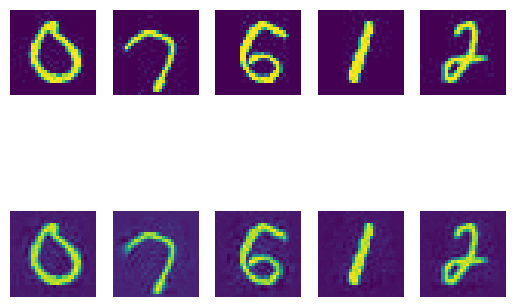

In [252]:
model.summary()

plt.figure()
plt.subplot(2,5,1)
# plt.title("Original")
plt.imshow(class1.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,2)
plt.imshow(class2.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,3)
plt.imshow(class3.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,4)
plt.imshow(class4.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,5)
plt.imshow(class5.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,6)
# plt.title("Original")
recon_class1 = model.predict(class1.reshape((1, -1)))
plt.imshow(recon_class1.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,7)
recon_class2 = model.predict(class2.reshape((1, -1)))
plt.imshow(recon_class2.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,8)
recon_class3 = model.predict(class3.reshape((1, -1)))
plt.imshow(recon_class3.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,9)
recon_class4 = model.predict(class4.reshape((1, -1)))
plt.imshow(recon_class4.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,10)
recon_class5 = model.predict(class5.reshape((1, -1)))
plt.imshow(recon_class5.reshape((28,28)))
plt.axis('off')

### Model 1

In [253]:
encoder = load_model("./autoencoder_models/encoder_1layer_256.h5")
encoded_train = encoder.predict(train_data)
encoded_test = encoder.predict(test_data)
encoded_val = encoder.predict(val_data)

119/119 [==============================] - 0s 305us/step


In [254]:
inputs = Input(shape=(256,), name="Input")
x = Dense(16, activation='tanh', name="Layer1")(inputs)
x = Dense(8, activation='tanh', name="Layer2")(x)
# x = Dense(128, activation='tanh', name="Layer3")(x)
# x = Dense(64, activation='tanh', name="Layer4")(x)
outputs = Dense(5, activation='softmax', name="Output")(x)
model = Model(inputs=inputs, outputs=outputs, name=f"Model-encoder{256}")
model.summary()

adam_optimizer = Adam(learning_rate = 0.001)

model.compile(optimizer=adam_optimizer,
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])
earlystopping = EarlyStopping(monitor='loss',
                                min_delta=1e-4,
                                patience=5,
                                verbose=1)
history1 = model.fit(x=encoded_train, y=train_labels,
                        batch_size=32, epochs=100_000,
                        callbacks=[earlystopping],
                        verbose=0, shuffle=True,
                        validation_split=0.0)

Model: "Model-encoder256"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 256)]             0         
                                                                 
 Layer1 (Dense)              (None, 16)                4112      
                                                                 
 Layer2 (Dense)              (None, 8)                 136       
                                                                 
 Output (Dense)              (None, 5)                 45        
                                                                 
Total params: 4,293
Trainable params: 4,293
Non-trainable params: 0
_________________________________________________________________
Epoch 41: early stopping


In [255]:
print("Training data evaluation")
model.evaluate(encoded_train, train_labels)
print("Testing data evaluation")
model.evaluate(encoded_test, test_labels)
print("Validation data evaluation")
model.evaluate(encoded_val, val_labels)
print()

Training data evaluation
356/356 [==============================] - 0s 248us/step - loss: 7.4062e-04 - accuracy: 0.9999
Testing data evaluation
119/119 [==============================] - 0s 249us/step - loss: 0.1217 - accuracy: 0.9771
Validation data evaluation
119/119 [==============================] - 0s 249us/step - loss: 0.1045 - accuracy: 0.9771



### Model 2

In [256]:
inputs = Input(shape=(256,), name="Input")
x = Dense(256, activation='tanh', name="Layer1")(inputs)
x = Dense(128, activation='tanh', name="Layer2")(x)
x = Dense(64, activation='tanh', name="Layer3")(x)
x = Dense(32, activation='tanh', name="Layer4")(x)
outputs = Dense(5, activation='softmax', name="Output")(x)
model = Model(inputs=inputs, outputs=outputs, name=f"Model-encoder{256}")
model.summary()

adam_optimizer = Adam(learning_rate = 0.001)

model.compile(optimizer=adam_optimizer,
                    loss="sparse_categorical_crossentropy",
                    metrics=['accuracy'])
earlystopping = EarlyStopping(monitor='loss',
                                        min_delta=1e-4,
                                        patience=5,
                                        verbose=1)
history1 = model.fit(x=encoded_train, y=train_labels,
                        batch_size=32, epochs=100_000,
                        callbacks=[earlystopping],
                        verbose=0, shuffle=True,
                        validation_split=0.0)

Model: "Model-encoder256"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 256)]             0         
                                                                 
 Layer1 (Dense)              (None, 256)               65792     
                                                                 
 Layer2 (Dense)              (None, 128)               32896     
                                                                 
 Layer3 (Dense)              (None, 64)                8256      
                                                                 
 Layer4 (Dense)              (None, 32)                2080      
                                                                 
 Output (Dense)              (None, 5)                 165       
                                                                 
Total params: 109,189
Trainable params: 109,189
No

In [257]:
print("Training data evaluation")
model.evaluate(encoded_train, train_labels)
print("Testing data evaluation")
model.evaluate(encoded_test, test_labels)
print("Validation data evaluation")
model.evaluate(encoded_val, val_labels)
print()

Training data evaluation
356/356 [==============================] - 0s 375us/step - loss: 2.7599e-05 - accuracy: 1.0000
Testing data evaluation
119/119 [==============================] - 0s 375us/step - loss: 0.0843 - accuracy: 0.9866
Validation data evaluation
119/119 [==============================] - 0s 375us/step - loss: 0.0870 - accuracy: 0.9852



## Three layer 256 bottleneck

In [258]:
model = load_model("./autoencoder_models/autoencoder_3layer_256.h5")

Model: "Autoencoder256"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Encoder-input (InputLayer)  [(None, 784)]             0         
                                                                 
 Encoder-hidden (Dense)      (None, 400)               314000    
                                                                 
 Bottleneck-layer (Dense)    (None, 256)               102656    
                                                                 
 Decoder-hidden (Dense)      (None, 400)               102800    
                                                                 
 Decoder-output (Dense)      (None, 784)               314384    
                                                                 
Total params: 833,840
Trainable params: 833,840
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 7ms/

(-0.5, 27.5, 27.5, -0.5)

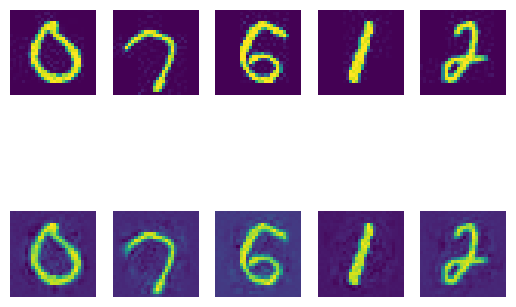

In [259]:
model.summary()

plt.figure()
plt.subplot(2,5,1)
# plt.title("Original")
plt.imshow(class1.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,2)
plt.imshow(class2.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,3)
plt.imshow(class3.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,4)
plt.imshow(class4.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,5)
plt.imshow(class5.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,6)
# plt.title("Original")
recon_class1 = model.predict(class1.reshape((1, -1)))
plt.imshow(recon_class1.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,7)
recon_class2 = model.predict(class2.reshape((1, -1)))
plt.imshow(recon_class2.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,8)
recon_class3 = model.predict(class3.reshape((1, -1)))
plt.imshow(recon_class3.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,9)
recon_class4 = model.predict(class4.reshape((1, -1)))
plt.imshow(recon_class4.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,10)
recon_class5 = model.predict(class5.reshape((1, -1)))
plt.imshow(recon_class5.reshape((28,28)))
plt.axis('off')

### Model 1

In [260]:
encoder = load_model("./autoencoder_models/encoder_3layer_256.h5")
encoded_train = encoder.predict(train_data)
encoded_test = encoder.predict(test_data)
encoded_val = encoder.predict(val_data)

119/119 [==============================] - 0s 411us/step


In [261]:
inputs = Input(shape=(256,), name="Input")
x = Dense(16, activation='tanh', name="Layer1")(inputs)
x = Dense(8, activation='tanh', name="Layer2")(x)
# x = Dense(128, activation='tanh', name="Layer3")(x)
# x = Dense(64, activation='tanh', name="Layer4")(x)
outputs = Dense(5, activation='softmax', name="Output")(x)
model = Model(inputs=inputs, outputs=outputs, name=f"Model-encoder{256}")
model.summary()

adam_optimizer = Adam(learning_rate = 0.001)

model.compile(optimizer=adam_optimizer,
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])
earlystopping = EarlyStopping(monitor='loss',
                                min_delta=1e-4,
                                patience=5,
                                verbose=1)
history1 = model.fit(x=encoded_train, y=train_labels,
                        batch_size=32, epochs=100_000,
                        callbacks=[earlystopping],
                        verbose=0, shuffle=True,
                        validation_split=0.0)

Model: "Model-encoder256"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 256)]             0         
                                                                 
 Layer1 (Dense)              (None, 16)                4112      
                                                                 
 Layer2 (Dense)              (None, 8)                 136       
                                                                 
 Output (Dense)              (None, 5)                 45        
                                                                 
Total params: 4,293
Trainable params: 4,293
Non-trainable params: 0
_________________________________________________________________
Epoch 48: early stopping


In [262]:
print("Training data evaluation")
model.evaluate(encoded_train, train_labels)
print("Testing data evaluation")
model.evaluate(encoded_test, test_labels)
print("Validation data evaluation")
model.evaluate(encoded_val, val_labels)
print()

Training data evaluation
356/356 [==============================] - 0s 248us/step - loss: 8.5852e-04 - accuracy: 0.9998
Testing data evaluation
119/119 [==============================] - 0s 247us/step - loss: 0.1109 - accuracy: 0.9758
Validation data evaluation
119/119 [==============================] - 0s 246us/step - loss: 0.0982 - accuracy: 0.9773



### Model 2

In [263]:
inputs = Input(shape=(256,), name="Input")
x = Dense(256, activation='tanh', name="Layer1")(inputs)
x = Dense(128, activation='tanh', name="Layer2")(x)
x = Dense(64, activation='tanh', name="Layer3")(x)
x = Dense(32, activation='tanh', name="Layer4")(x)
outputs = Dense(5, activation='softmax', name="Output")(x)
model = Model(inputs=inputs, outputs=outputs, name=f"Model-encoder{256}")
model.summary()

adam_optimizer = Adam(learning_rate = 0.001)

model.compile(optimizer=adam_optimizer,
                    loss="sparse_categorical_crossentropy",
                    metrics=['accuracy'])
earlystopping = EarlyStopping(monitor='loss',
                                        min_delta=1e-4,
                                        patience=5,
                                        verbose=1)
history1 = model.fit(x=encoded_train, y=train_labels,
                        batch_size=32, epochs=100_000,
                        callbacks=[earlystopping],
                        verbose=0, shuffle=True,
                        validation_split=0.0)

Model: "Model-encoder256"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 256)]             0         
                                                                 
 Layer1 (Dense)              (None, 256)               65792     
                                                                 
 Layer2 (Dense)              (None, 128)               32896     
                                                                 
 Layer3 (Dense)              (None, 64)                8256      
                                                                 
 Layer4 (Dense)              (None, 32)                2080      
                                                                 
 Output (Dense)              (None, 5)                 165       
                                                                 
Total params: 109,189
Trainable params: 109,189
No

In [264]:
print("Training data evaluation")
model.evaluate(encoded_train, train_labels)
print("Testing data evaluation")
model.evaluate(encoded_test, test_labels)
print("Validation data evaluation")
model.evaluate(encoded_val, val_labels)
print()

Training data evaluation
356/356 [==============================] - 0s 374us/step - loss: 0.0201 - accuracy: 0.9939
Testing data evaluation
119/119 [==============================] - 0s 378us/step - loss: 0.1212 - accuracy: 0.9723
Validation data evaluation
119/119 [==============================] - 0s 369us/step - loss: 0.0831 - accuracy: 0.9784

